# Import important Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#reading the datset
housing_dataset = pd.read_csv("housing_train.csv")
housing_dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#storing the copy of dataset in another dataframe
housing_train=housing_dataset
housing_train.shape

(1460, 81)

# Visualizing

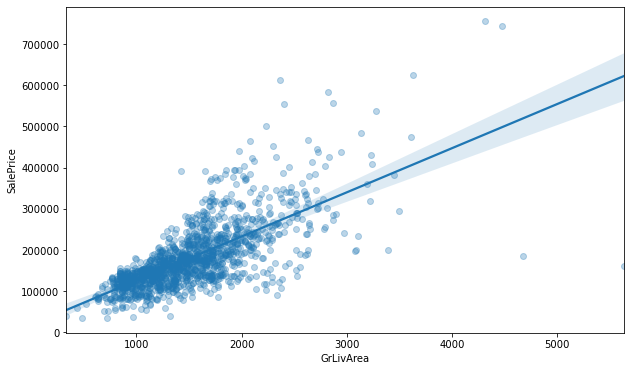

In [4]:
# First we visually inspect a scatter plot of GrLivArea vs. SalePrice
plt.figure(figsize=(10,6))
sns.regplot(housing_train.GrLivArea, housing_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

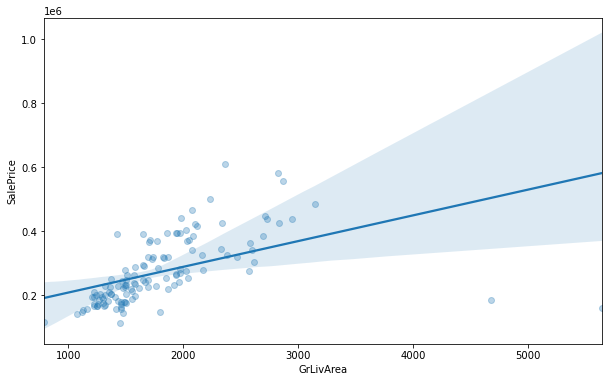

In [5]:
# We see the outliers but are also interested in those Partial Sale outliers
plt.figure(figsize=(10,6))
sns.regplot(housing_train[housing_train.SaleCondition == 'Partial'].GrLivArea,
            housing_train[housing_train.SaleCondition == 'Partial'].SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [6]:
"""There are 4 observations that one may wish to remove from the data set before using it (a plot of SALE 
PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t 
represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). 
I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 4 unusual 
observations)."""

'There are 4 observations that one may wish to remove from the data set before using it (a plot of SALE \nPRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t \nrepresent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). \nI would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 4 unusual \nobservations).'

In [7]:
housing_train.drop(housing_train[housing_train.GrLivArea >= 4000].index, inplace=True)
housing_train.shape

(1456, 81)

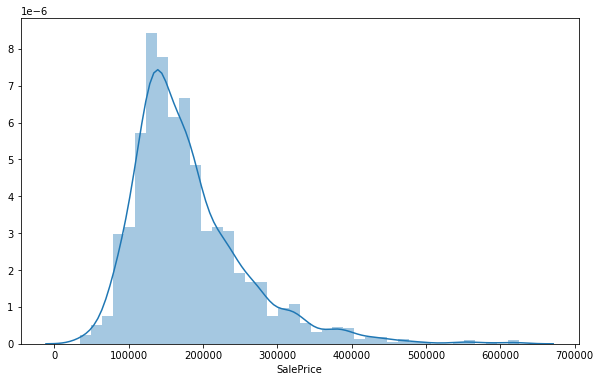

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(housing_train.SalePrice)
plt.show()

#Sales is right skewed and hence we have to take the log transform

In [9]:
#reading the test datset
housing_test_ = pd.read_csv("housing_test.csv")
housing_test=housing_test_

In [10]:
#storing the numerical features
num_train=housing_train.select_dtypes(include=["int64","float64"]).drop(["SalePrice","Id"],axis=1)
num_test=housing_test.select_dtypes(include=["int64","float64"]).drop(["Id"],axis=1)

In [11]:
#storing the categorical features
cat=pd.concat([housing_train,housing_test]).select_dtypes(include=["object"])
cat.shape
cat_train=cat.iloc[:1456,:]
cat_train.shape

(1456, 43)

# Feature Engineering on the numerical features on testing and training 

### Numerical training

In [12]:
# Total Square Footage
num_train['TotalSF'] = num_train.TotalBsmtSF + num_train.GrLivArea
num_train['TotalFloorSF'] = num_train['1stFlrSF'] + num_train['2ndFlrSF']
num_train['TotalPorchSF'] = num_train.OpenPorchSF + num_train.EnclosedPorch + \
    num_train['3SsnPorch'] + num_train.ScreenPorch
    
# Total Bathrooms
num_train['TotalBathrooms'] = num_train.FullBath + .5 * num_train.HalfBath + \
    num_train.BsmtFullBath + .5 * num_train.BsmtHalfBath

# Booleans
num_train['HasBasement'] = num_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
num_train['HasGarage'] = num_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
num_train['HasPorch'] = num_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
num_train['HasPool'] = num_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
num_train['WasRemodeled'] = (num_train.YearRemodAdd != num_train.YearBuilt).astype(np.int64)
num_train['IsNew'] = (num_train.YearBuilt > 2000).astype(np.int64)
num_train['WasCompleted'] = (cat_train.SaleCondition != 'Partial').astype(np.int64)
num_train['BedroomAbvGr_T/F'] = (num_train.BedroomAbvGr > 0).astype(np.int64)
num_train['KitchenAbvGr_T/F'] = (num_train.KitchenAbvGr > 0).astype(np.int64)

#dropping features which are not required
num_train.drop(["YearRemodAdd"],axis=1,inplace=True)
num_train.drop(["YearBuilt"],axis=1,inplace=True)
num_train.drop(["MoSold"],axis=1,inplace=True)
num_train.drop(["YrSold"],axis=1,inplace=True)
num_train.shape

#filling nan values with zero
num_train=num_train.fillna(0)
num_train.isnull().sum()

#remving duplicates from numerical features (if any)
num_train = num_train.loc[:,~num_train.columns.duplicated()]
num_train.shape

(1456, 45)

In [13]:
cat_test=cat.iloc[1456:,:]
cat_test.shape

(1459, 43)

### Numerical test dataset

In [14]:
# Total Square Footage
num_test['TotalSF'] = num_test.TotalBsmtSF + num_test.GrLivArea
num_test['TotalFloorSF'] = num_test['1stFlrSF'] + num_test['2ndFlrSF']
num_test['TotalPorchSF'] = num_test.OpenPorchSF + num_test.EnclosedPorch + \
    num_test['3SsnPorch'] + num_test.ScreenPorch
    
# Total Bathrooms
num_test['TotalBathrooms'] = num_test.FullBath + .5 * num_test.HalfBath + \
    num_test.BsmtFullBath + .5 * num_test.BsmtHalfBath

# Booleans
num_test['HasBasement'] = num_test.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
num_test['HasGarage'] = num_test.GarageArea.apply(lambda x: 1 if x > 0 else 0)
num_test['HasPorch'] = num_test.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
num_test['HasPool'] = num_test.PoolArea.apply(lambda x: 1 if x > 0 else 0)
num_test['WasRemodeled'] = (num_test.YearRemodAdd != num_test.YearBuilt).astype(np.int64)
num_test['IsNew'] = (num_test.YearBuilt > 2000).astype(np.int64)
num_test['WasCompleted'] = (cat_test.SaleCondition != 'Partial').astype(np.int64)
num_test['BedroomAbvGr_T/F'] = (num_test.BedroomAbvGr > 0).astype(np.int64)
num_test['KitchenAbvGr_T/F'] = (num_test.KitchenAbvGr > 0).astype(np.int64)

#dropping features which are not required
num_test.drop(["YearRemodAdd"],axis=1,inplace=True)
num_test.drop(["YearBuilt"],axis=1,inplace=True)
num_test.drop(["MoSold"],axis=1,inplace=True)
num_test.drop(["YrSold"],axis=1,inplace=True)

#filling nan values with zero
num_test=num_test.fillna(0)
num_test.isnull().sum()
num_test.shape

#remving duplicates from numerical features (if any)
num_test = num_test.loc[:,~num_train.columns.duplicated()]
num_test.shape

(1459, 45)

# Feature Engineering on the Categorical columns 

In [15]:
# Alley
cat.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
cat.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
cat.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
cat.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
cat.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
cat.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
cat.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
cat.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
cat.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
cat.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
cat.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
cat.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
cat.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
cat.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
cat.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
cat.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
cat.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
cat.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
cat.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
cat.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
cat.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#CentralAir
cat.CentralAir.replace({'N':0, 'Y':1}, inplace=True)


#filling NAN Values with 0

list_ordinal=["Alley","LotShape","LandContour","Utilities","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure"
      ,"BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond"
      ,"PavedDrive","PoolQC","CentralAir"]
for j in list_ordinal:
    cat[j]=cat[j].fillna(0)


#Creating dummy variables where ordinality is not found

list_dummy=["MSZoning","Street","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle"
            ,"RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","Electrical","GarageType","Fence"
            ,"MiscFeature","SaleType","SaleCondition"]
for i in list_dummy:
    cat = pd.concat([cat,pd.get_dummies(cat[i], prefix=i)],axis=1)



#Removing duplicates in the categorical features
cat = cat.loc[:,~cat.columns.duplicated()]


#deleting the string features because the object types has been stored as ordinal or dummy variables
cat=cat.select_dtypes(exclude="object")
cat.shape

(2915, 183)

# Separating the train and test categorical variables

In [16]:
cat_train=cat.iloc[:1456,:]
cat_test=cat.iloc[1456:,:]
print(cat_train.shape)
cat_test.shape

(1456, 183)


(1459, 183)

# Creating the input and output variables for testing and training

In [17]:
#storing Y=output and appliying log transform to remove skewness
Y=np.asarray(housing_train["SalePrice"])
Y=np.log(Y)
Y.shape

(1456,)

In [43]:
X=pd.concat([num_train,cat_train],axis=1) #defining the input variables
#X=np.log1p(X)

In [44]:
#splitting the selected features into train and test subsets with test size of 20%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (1164, 228) (1164,)
Test set: (292, 228) (292,)


# Training with Linear Regression

In [45]:
#defining the objects of linear regression and finding the outputs
LR=LinearRegression()
#training the model
LR.fit(X_train,Y_train)
m = LR.coef_[0]
c = LR.intercept_
print(' y = {0} * x + {1}'.format(m, c))

 y = -0.0006907158278607463 * x + 9.425568649516574


In [46]:
#Predicting the outputs
Y_pred = LR.predict(X_test)

In [47]:
#Taking the antilog of ouput because it was log transformed earlier
Y_predictions = np.exp(Y_pred) #antilog

In [48]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((Y_pred - Y_test) ** 2))
#Root mean squarred error
print("Root Mean squared error: %.2f" % (np.mean((Y_pred - Y_test) ** 2))**0.5)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LR.score(X_test, Y_test))

Mean squared error: 0.01
Root Mean squared error: 0.12
Variance score: 0.91


In [24]:
Xt=pd.concat([num_test,cat_test],axis=1) #training with the entire dataset as input

# Training with entire train dataset as given from kaggle

In [25]:
#defining the objects of linear regression and finding the outputs
linreg=LinearRegression()
#training the model
linreg.fit(X,Y)
mr = linreg.coef_[0]
cr = linreg.intercept_
print(' y = {0} * x + {1}'.format(mr, cr))

 y = -0.0007441178796020673 * x + 9.502285225450219


In [26]:
#Predicting the outputs
Y_output = linreg.predict(Xt)

In [27]:
#Taking the antilog of ouput because it was log transformed earlier
output = np.exp(Y_output) #antilog

In [28]:
output

array([121458.70629144, 181188.43023346, 177823.668907  , ...,
       162431.50175979, 110683.0601226 , 215893.33726651])

In [29]:
housing_test["output"]=output #storing the output in a dataframe

In [30]:
o1=housing_test["Id"]
o2=housing_test["output"]

In [31]:
final_prediction_housing=pd.concat([o1,o2],axis=1) #final dataframe

In [32]:
final_prediction_housing.reset_index(drop=True, inplace=True) #Resetting the index

In [33]:
final_prediction_housing.to_csv('housing_predictions.csv') #Storing in a CSV file